In [20]:
%reset -f

## Assignment E - Brightfield histology color deconvolution
- Author: Catherine Chia and Aoming Sun
- Teacher and TAs: Marten Postma, Aaron Lin, Aoming Sun, Catherine Chia
- Date: 21st June, 2023

### Outline of workflow
1. Prerequisites: 
- Use ImageJ to crop and export images: Stain 1, Stain 2, Background, __OR__ 
- Use ImageJ to export the RGB vectors for the same images

2. Preprocessing

3. Color Deconvolution

4. Separate stains

In [21]:
#Libraries
from matplotlib import pyplot as plt, patches
import numpy as np

#Enable nice output printing features
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last_expr_or_assign'
import warnings
warnings.filterwarnings('ignore')

#Add other libraries as you see fit
import glob
from skimage import io

### __Preprocessing steps__

In [34]:
#Start coding here

#Import IHC image and split it to RGB
img_ihc = io.imread('IPQDA_23_ASS_E_DATA/H_E.tif')
img_ihc_red = img_ihc[:, :, 0]
img_ihc_green = img_ihc[:, :, 1]
img_ihc_blue = img_ihc[:, :, 2]

#Import cropped stain1, stain2 and background ROI images, OR import RGB vectors of the ROIs
img_eosin = io.imread('IPQDA_23_ASS_E_DATA/eosin.tif')
img_hematoxylin = io.imread('IPQDA_23_ASS_E_DATA/hematoxylin.tif')
img_background = io.imread('IPQDA_23_ASS_E_DATA/background.tif')

#End coding here

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


array([[[251, 249, 254],
        [254, 252, 255],
        [254, 252, 255],
        ...,
        [254, 252, 255],
        [251, 251, 253],
        [251, 251, 253]],

       [[253, 251, 255],
        [255, 254, 255],
        [255, 253, 255],
        ...,
        [254, 252, 255],
        [253, 253, 255],
        [252, 252, 254]],

       [[253, 251, 255],
        [255, 254, 255],
        [254, 252, 255],
        ...,
        [252, 250, 255],
        [252, 252, 254],
        [252, 252, 254]],

       ...,

       [[255, 251, 255],
        [255, 251, 255],
        [255, 250, 255],
        ...,
        [253, 251, 255],
        [252, 252, 254],
        [248, 248, 250]],

       [[255, 251, 255],
        [255, 250, 255],
        [254, 249, 255],
        ...,
        [250, 248, 253],
        [255, 255, 255],
        [252, 252, 254]],

       [[253, 251, 255],
        [251, 249, 254],
        [251, 249, 254],
        ...,
        [249, 247, 252],
        [255, 255, 255],
        [254, 254, 255]]

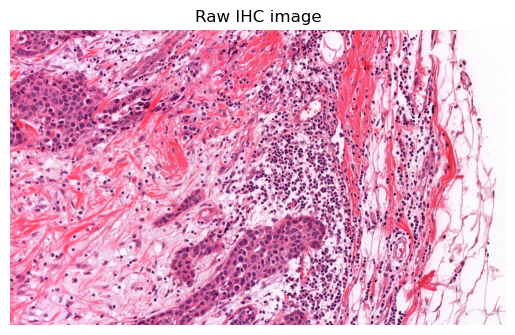

In [35]:
#Inspect imported IHC image
plt.title("Raw IHC image")
plt.axis('off')
plt.imshow(img_ihc)

### Calculate RGB mean of the images

In [36]:
#Start coding here

#Calculate mean of image for each RGB channels. If you use RGB vectors, assign them directly to the variables here
mean_img_stain1 = np.mean(img_eosin, axis=(0, 1))
mean_img_stain2 = np.mean(img_hematoxylin, axis=(0, 1))
mean_img_background = np.mean(img_background, axis=(0, 1))

#End coding here

print(mean_img_stain1)
print(mean_img_stain2)
print(mean_img_background)

[234.02722323 104.67876588 143.75499093]
[170.95439377 116.9432703  164.54060067]
[252.23295455 250.04924242 254.0094697 ]


### Inspect ROIs of stains and background to ensure correct stain color selection

#ea688f
#aa74a4
#fcfafe


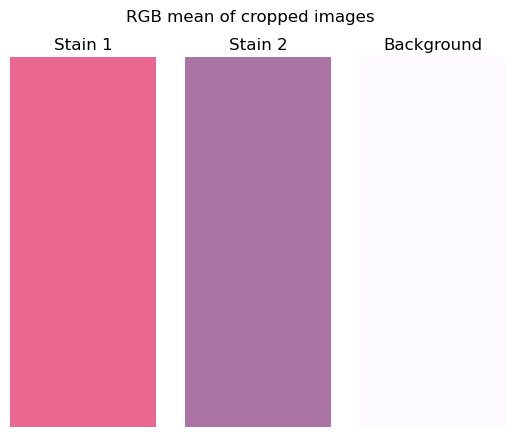

In [37]:
#Convert RGB values to Hex color values for visualization
hex_img_stain1 = '#%02x%02x%02x' % tuple(mean_img_stain1.astype(int))
hex_img_stain2 = '#%02x%02x%02x' % tuple(mean_img_stain2.astype(int))
hex_img_background = '#%02x%02x%02x' % tuple(mean_img_background.astype(int))

print(hex_img_stain1)
print(hex_img_stain2)
print(hex_img_background)

#Visualization of RGB mean of cropped images
fig, axs = plt.subplots(1,3)

fig.suptitle('RGB mean of cropped images')

rectangle_stain1 = patches.Rectangle((0, 0), 1, 1, facecolor=hex_img_stain1)
rectangle_stain2 = patches.Rectangle((0, 0), 1, 1, facecolor=hex_img_stain2)
rectangle_background = patches.Rectangle((0, 0), 1, 1, facecolor=hex_img_background)

axs[0].add_patch(rectangle_stain1)
axs[1].add_patch(rectangle_stain2)
axs[2].add_patch(rectangle_background)
axs[0].set_title('Stain 1')
axs[1].set_title('Stain 2')
axs[2].set_title('Background')

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
plt.show()

### __Color Deconvolution__

### Calculate transmittance, T and convert it to absorbances, OD according to Beer–Lambert law  

In [38]:
#Calculate transmittances, T for each stain
T_stain1 = mean_img_background/mean_img_stain1
T_stain2 = mean_img_background/mean_img_stain2
OD_stain1 = np.log10(T_stain1)
OD_stain2 = np.log10(T_stain2)

print(OD_stain1)
print(OD_stain2)

[0.03253545 0.37816695 0.24722698]
[0.16892156 0.33005031 0.18857683]


### Normalize the absorbances to vector lengths

In [39]:
#Start coding here

# Normalize the absorbances
OD_stain1_norm = OD_stain1 / np.max(OD_stain1)
OD_stain2_norm = OD_stain2 / np.max(OD_stain2)

#End coding here

print(OD_stain1_norm)
print(OD_stain2_norm)

[0.08603461 1.         0.65375088]
[0.51180549 1.         0.57135783]


### Form a deconvolution matrix

In [40]:
#Start coding here

#Combine OD_stain1_norm and OD_stain2_norm to form a normalized OD matrix M
M = np.column_stack((OD_stain1_norm, OD_stain2_norm))

#Calculate the deconvolution matrix according to Linear regression
MT = np.linalg.pinv(M)
MT_M = np.dot(MT, M)
inversed_MT_M = np.linalg.inv(MT_M)
D = np.dot(inversed_MT_M, MT)

#End coding here

print("M")
print(M)
print("M transposed")
print(MT)
print("Inversed M transposed multiplied with M")
print(inversed_MT_M)
print("Deconvolution matrix, D")
print(D)

M
[[0.08603461 0.51180549]
 [1.         1.        ]
 [0.65375088 0.57135783]]
M transposed
[[-2.18464629  0.63379716  0.84765934]
 [ 2.27189749  0.06393583 -0.39678365]]
Inversed M transposed multiplied with M
[[ 1.00000000e+00 -5.55111512e-17]
 [-5.55111512e-17  1.00000000e+00]]
Deconvolution matrix, D
[[-2.18464629  0.63379716  0.84765934]
 [ 2.27189749  0.06393583 -0.39678365]]


### Calculate the coefficient for each stain 

In [41]:
#Convert pixel intensity to transmittance to absorbance according to Beer-Lambert Law on the IHC image
#Calculate the transmittance
T_img_ihc = mean_img_background/img_ihc

#Because of the logarithmic function in the next step, we assign all transmittance value less than 1 to 1 
T_img_ihc[T_img_ihc<1] = 1

In [42]:
#Start coding here

#Calculate the absorbance
OD_img_ihc = -np.log10(T_img_ihc)


#Coefficient matrix
coeffs = np.dot(np.reshape(OD_img_ihc, (-1, 3)), D.T)


#Extracting the individual coefficients from the coefficient matrix
#Which are essentially the orthogonal representation of the stains of the IHC image
coeff_stain1 = coeffs[:, 0]
coeff_stain2 = coeffs[:, 1]


#End coding here

print(coeff_stain1.shape)
print(coeff_stain2.shape)

(8951993,)
(8951993,)


### __Separate stains__

### Multiply the coefficients with the stain absorbance to get the image absorbance per stain

In [43]:
#Initialize the image absorbance container per stain
OD_img_ihc_stain1 = np.zeros((img_ihc.shape[0], img_ihc.shape[1], img_ihc.shape[2]))
OD_img_ihc_stain2 = np.zeros((img_ihc.shape[0], img_ihc.shape[1], img_ihc.shape[2]))


#Start coding here

#Multiply the coefficients with the stain absorbance per stain. Do it independently for each RGB layer
OD_img_ihc_stain1 = np.reshape(coeff_stain1, img_ihc_red.shape)[:, :, np.newaxis] * OD_stain1
OD_img_ihc_stain2 = np.reshape(coeff_stain2, img_ihc_red.shape)[:, :, np.newaxis] * OD_stain2


#End coding here

array([[[ 2.52267569e-03,  4.92897349e-03,  2.81620762e-03],
        [ 2.63628017e-03,  5.15094156e-03,  2.94303081e-03],
        [ 5.07086973e-03,  9.90780644e-03,  5.66090283e-03],
        ...,
        [ 1.08521910e-06,  2.12037408e-06,  1.21149234e-06],
        [-1.58999420e-03, -3.10663765e-03, -1.77500176e-03],
        [ 1.08521910e-06,  2.12037408e-06,  1.21149234e-06]],

       [[-8.69369354e-03, -1.69863233e-02, -9.70526891e-03],
        [-3.27873752e-03, -6.40621796e-03, -3.66024282e-03],
        [ 3.15025927e-03,  6.15518852e-03,  3.51681518e-03],
        ...,
        [-1.97231742e-05, -3.85364647e-05, -2.20181110e-05],
        [-6.05236600e-04, -1.18255199e-03, -6.75660343e-04],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-1.00838287e-02, -1.97024629e-02, -1.12571565e-02],
        [-4.79412084e-03, -9.36707585e-03, -5.35195217e-03],
        [ 9.66529139e-04,  1.88846966e-03,  1.07899193e-03],
        ...,
        [-1.97231742e-05, -3.85364647e-05,

### Convert the image absorbance to image transmittance  

In [44]:
#Convert absorbance to transmittance
T_img_ihc_stain1 = 10**(-OD_img_ihc_stain1)
T_img_ihc_stain2 = 10**(-OD_img_ihc_stain2)

array([[[0.99420816, 0.98871478, 0.99353642],
        [0.99394813, 0.98820958, 0.99324633],
        [0.98839179, 0.97744469, 0.98704987],
        ...,
        [0.9999975 , 0.99999512, 0.99999721],
        [1.00366781, 1.00717894, 1.00409546],
        [0.9999975 , 0.99999512, 0.99999721]],

       [[1.02021967, 1.03988742, 1.02259878],
        [1.00757814, 1.01486019, 1.00846364],
        [0.9927725 , 0.98592712, 0.99193493],
        ...,
        [1.00004542, 1.00008874, 1.0000507 ],
        [1.00139458, 1.00272664, 1.00155698],
        [1.        , 1.        , 1.        ]],

       [[1.02349053, 1.0464114 , 1.02625942],
        [1.01110002, 1.02180277, 1.01239957],
        [0.99777696, 0.99566108, 0.99751861],
        ...,
        [1.00004542, 1.00008874, 1.0000507 ],
        [1.00008638, 1.00016878, 1.00009643],
        [1.00008638, 1.00016878, 1.00009643]],

       ...,

       [[0.97647561, 0.95455235, 0.97377457],
        [0.97826749, 0.95797784, 0.97576963],
        [0.97765483, 0

### Clip each layer in the image transmittance to values between 0 and 1, preparing for conversion to values between 0 and 255 later

In [45]:
#Clip each layer to 0,1
T_img_ihc_stain1[T_img_ihc_stain1>1] = 1
T_img_ihc_stain2[T_img_ihc_stain2>1] = 1
T_img_ihc_stain1[T_img_ihc_stain1<0] = 0
T_img_ihc_stain2[T_img_ihc_stain2<0] = 0
T_img_ihc_stain1_norm = T_img_ihc_stain1
T_img_ihc_stain2_norm = T_img_ihc_stain2

array([[[0.99420816, 0.98871478, 0.99353642],
        [0.99394813, 0.98820958, 0.99324633],
        [0.98839179, 0.97744469, 0.98704987],
        ...,
        [0.9999975 , 0.99999512, 0.99999721],
        [1.        , 1.        , 1.        ],
        [0.9999975 , 0.99999512, 0.99999721]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [0.9927725 , 0.98592712, 0.99193493],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [0.99777696, 0.99566108, 0.99751861],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.97647561, 0.95455235, 0.97377457],
        [0.97826749, 0.95797784, 0.97576963],
        [0.97765483, 0

### Convert the image transmittance to values between 0 and 255 (integers), so that plotting is possible

In [46]:
#Start coding here

T_img_ihc_stain1 = 10 ** (-OD_img_ihc_stain1)

T_img_ihc_stain2 = 10 ** (-OD_img_ihc_stain2)

#End coding here


array([[[0.99420816, 0.98871478, 0.99353642],
        [0.99394813, 0.98820958, 0.99324633],
        [0.98839179, 0.97744469, 0.98704987],
        ...,
        [0.9999975 , 0.99999512, 0.99999721],
        [1.00366781, 1.00717894, 1.00409546],
        [0.9999975 , 0.99999512, 0.99999721]],

       [[1.02021967, 1.03988742, 1.02259878],
        [1.00757814, 1.01486019, 1.00846364],
        [0.9927725 , 0.98592712, 0.99193493],
        ...,
        [1.00004542, 1.00008874, 1.0000507 ],
        [1.00139458, 1.00272664, 1.00155698],
        [1.        , 1.        , 1.        ]],

       [[1.02349053, 1.0464114 , 1.02625942],
        [1.01110002, 1.02180277, 1.01239957],
        [0.99777696, 0.99566108, 0.99751861],
        ...,
        [1.00004542, 1.00008874, 1.0000507 ],
        [1.00008638, 1.00016878, 1.00009643],
        [1.00008638, 1.00016878, 1.00009643]],

       ...,

       [[0.97647561, 0.95455235, 0.97377457],
        [0.97826749, 0.95797784, 0.97576963],
        [0.97765483, 0

### Visualize deconvolved images

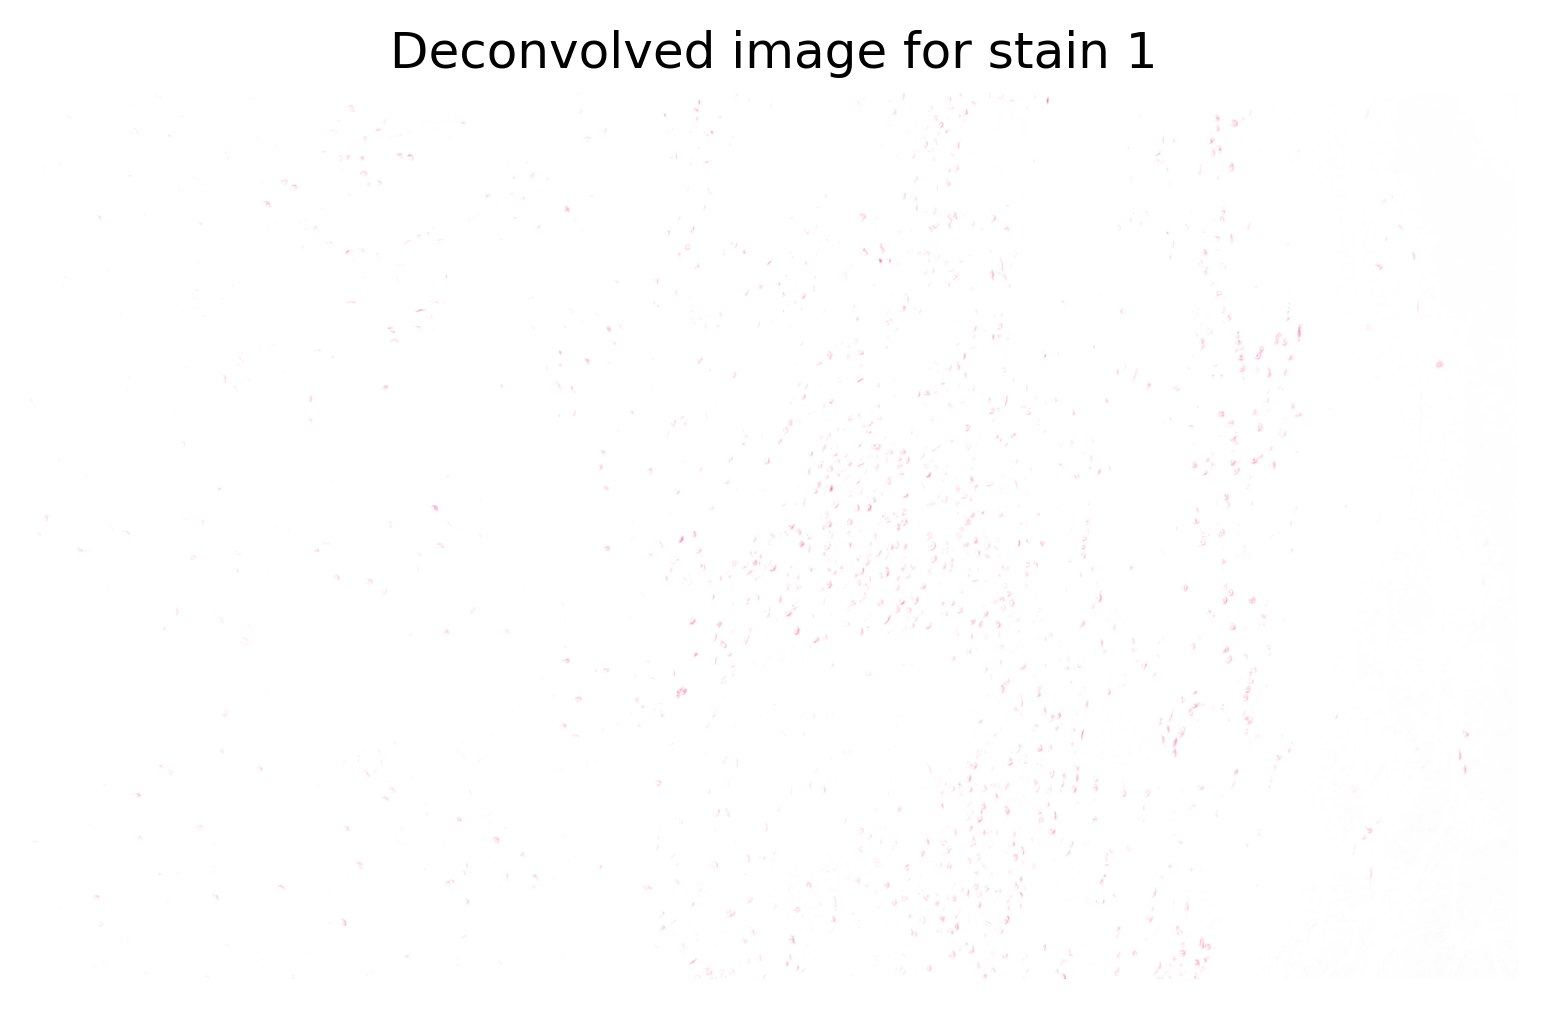

In [47]:
#Display deconvolved image for stain 1
fig = plt.figure(dpi=300)
plt.title("Deconvolved image for stain 1")
plt.axis('off')
plt.imshow(T_img_ihc_stain1_norm)
fig.savefig('T_img_ihc_stain1_norm.tif')


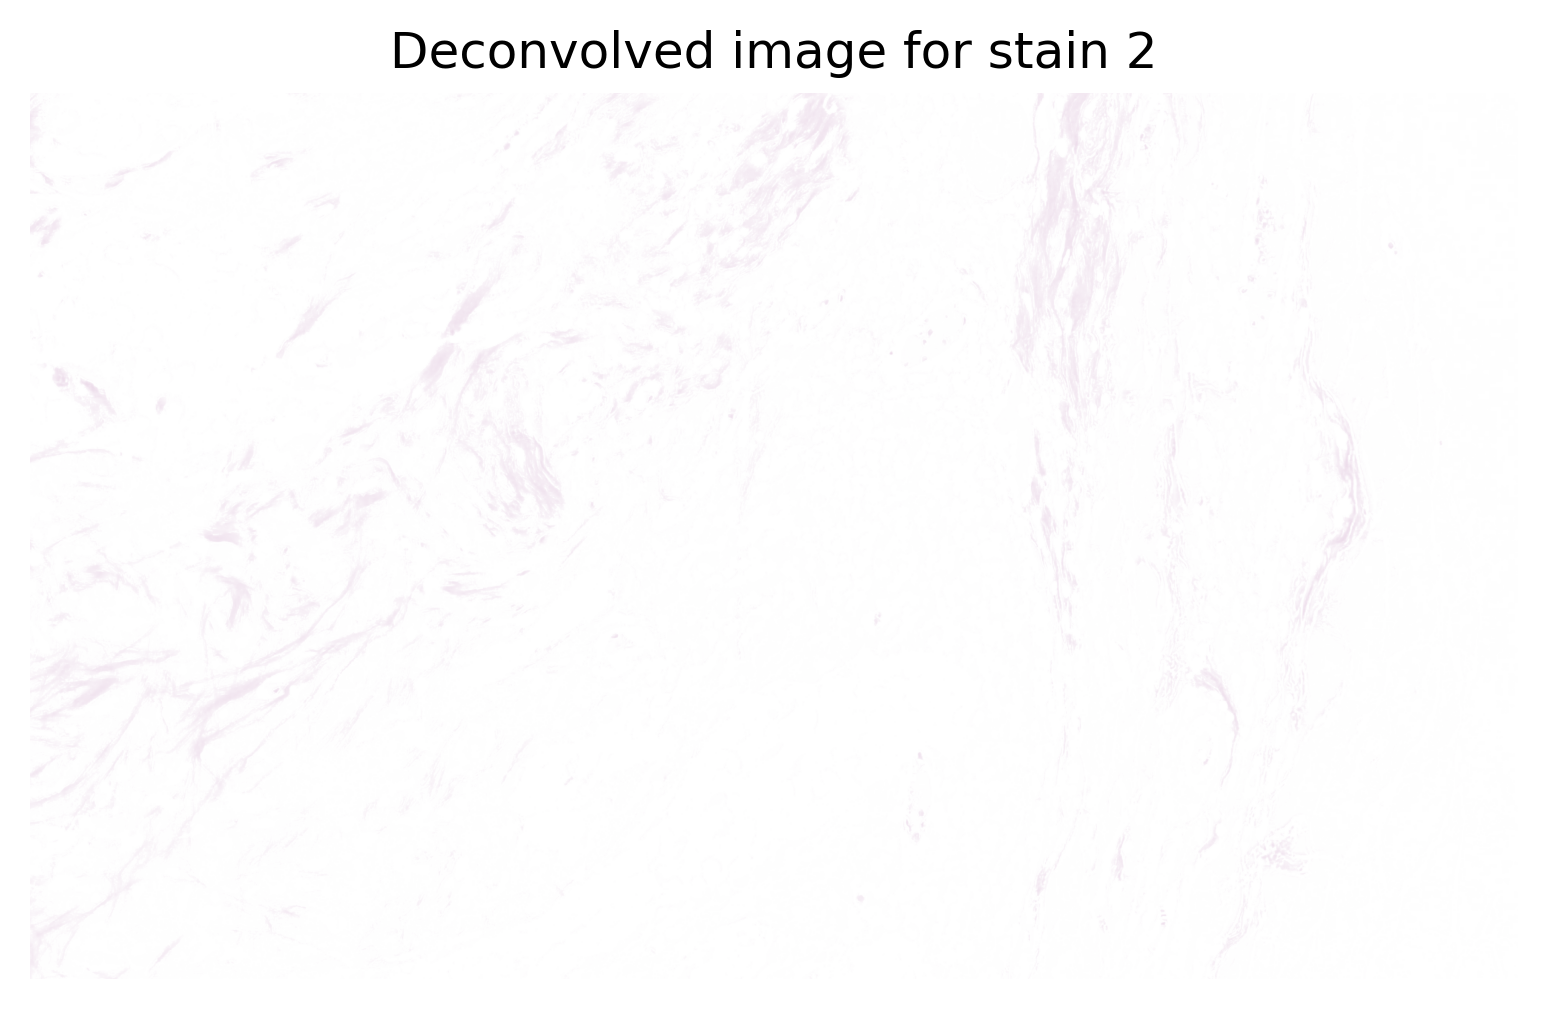

In [48]:
#Display and export deconvolved image for stain 1
fig = plt.figure(dpi=300)
plt.title("Deconvolved image for stain 2")
plt.axis('off')
plt.imshow(T_img_ihc_stain2_norm)
fig.savefig('T_img_ihc_stain2_norm.tif')